In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
tf.enable_eager_execution()

In [3]:
from tfdiffeq import odeint

In [4]:
NUM_SAMPLES = 1000
device = 'cpu:0' 

In [5]:
from tfdiffeq import plot_phase_portrait, plot_vector_field, plot_results

In [27]:
initial_states = tf.convert_to_tensor([0., 1.], dtype=tf.float64); initial_states

<tf.Tensor: id=150690, shape=(2,), dtype=float64, numpy=array([0., 1.])>

In [78]:
t = tf.linspace(0., 50., num=1000); t.shape

TensorShape([Dimension(1000)])

In [79]:
class Lambda(tf.keras.Model):
  
  def call(self, t, y):
    # y now reprents the a vector of [u, v]
    u, v = y[0], y[1]
    
    du_dt = v
    dv_dt = -u/(1+u)
    
    return tf.stack([du_dt, dv_dt])  # vector of shape [2]

In [80]:
%%time

with tf.device(device):
  result = odeint(Lambda(), initial_states, t)

print("Completed integration ! Output Shape =", result.shape)

Completed integration ! Output Shape = (1000, 2)
CPU times: user 6.25 s, sys: 0 ns, total: 6.25 s
Wall time: 6.27 s


In [71]:
result

<tf.Tensor: id=819603, shape=(100, 2), dtype=float64, numpy=
array([[ 0.        ,  1.        ],
       [ 0.05048411,  0.99876624],
       [ 0.10084658,  0.99522157],
       [ 0.15097628,  0.98957998],
       [ 0.20077212,  0.98203113],
       [ 0.25014205,  0.97274367],
       [ 0.29900227,  0.96186725],
       [ 0.34727593,  0.94953541],
       [ 0.39489251,  0.93586832],
       [ 0.44178735,  0.92097362],
       [ 0.48790103,  0.90494807],
       [ 0.53317873,  0.88787889],
       [ 0.57756971,  0.86984558],
       [ 0.62102693,  0.8509205 ],
       [ 0.66350723,  0.831169  ],
       [ 0.70497041,  0.81065099],
       [ 0.74537925,  0.78942096],
       [ 0.78469898,  0.76752943],
       [ 0.82289724,  0.74502312],
       [ 0.85994406,  0.72194494],
       [ 0.89581179,  0.69833417],
       [ 0.93047441,  0.67422771],
       [ 0.96390784,  0.64965935],
       [ 0.99608955,  0.62466088],
       [ 1.02699854,  0.59926219],
       [ 1.05661506,  0.57349155],
       [ 1.08492102,  0.54737

(-2, 2)

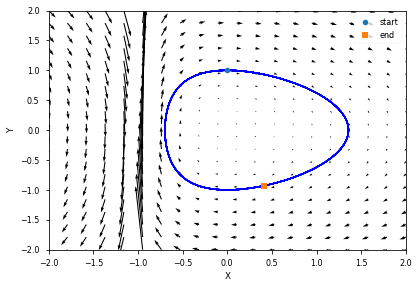

In [81]:


lims = [-2, 2]
plot_phase_portrait(Lambda(), xlims=lims, ylims=lims, ip_rank=1) # the function accepts a vector as input, so input rank is 1 by default.
plot_vector_field(result)
plt.xlim(lims)
plt.ylim(lims)



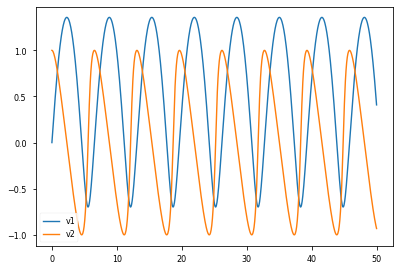

In [82]:
plot_results(t, result)